<a href="https://colab.research.google.com/github/Shivendu23/Myfiles/blob/main/Lung_Cancer_Data_Analaysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("aagambshah/lung-cancer-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/lung-cancer-dataset


In [2]:
import pandas as pd
file_path = '/content/survey_lung_cancer[1].csv'

In [5]:
df = pd.read_csv(file_path)
print("Top 5 rows of the dataset:")
print(df.head())

Top 5 rows of the dataset:
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                

In [6]:
print(df.info()) # Check data types and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [7]:
df_processed = df.copy()

In [14]:
df.columns = df.columns.str.strip()

In [15]:
print("--- Actual Columns in the DataFrame AFTER stripping spaces ---")
print(df.columns.tolist()) # Convert to list for easier visual comparison
print("-" * 50) # Separator for clarity

--- Actual Columns in the DataFrame AFTER stripping spaces ---
['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING', 'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH', 'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER']
--------------------------------------------------


In [16]:
binary_cols = ['SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
               'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
               'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
               'SWALLOWING DIFFICULTY', 'CHEST PAIN']

# Create a copy of the DataFrame to work with processed data
df_processed = df.copy()

# Loop through the binary columns and map their values
print("\n--- Applying Transformations ---")
for col in binary_cols:
    try:
        # Check if the column exists before mapping
        if col in df_processed.columns:
            df_processed[col] = df_processed[col].map({1: 'No', 2: 'Yes'})
            print(f"Successfully mapped '{col}'")
        else:
            print(f"Warning: Column '{col}' not found in DataFrame. Skipping transformation for this column.")
    except Exception as e:
        print(f"Error processing column '{col}': {e}")


--- Applying Transformations ---
Successfully mapped 'SMOKING'
Successfully mapped 'YELLOW_FINGERS'
Successfully mapped 'ANXIETY'
Successfully mapped 'PEER_PRESSURE'
Successfully mapped 'CHRONIC DISEASE'
Successfully mapped 'FATIGUE'
Successfully mapped 'ALLERGY'
Successfully mapped 'WHEEZING'
Successfully mapped 'ALCOHOL CONSUMING'
Successfully mapped 'COUGHING'
Successfully mapped 'SHORTNESS OF BREATH'
Successfully mapped 'SWALLOWING DIFFICULTY'
Successfully mapped 'CHEST PAIN'


In [17]:
if 'GENDER' in df_processed.columns:
    df_processed['GENDER'] = df_processed['GENDER'].map({'M': 'Male', 'F': 'Female'})
    print("Successfully mapped 'GENDER'")
else:
    print("Warning: Column 'GENDER' not found. Skipping 'GENDER' transformation.")

if 'LUNG_CANCER' in df_processed.columns:
    df_processed['LUNG_CANCER'] = df_processed['LUNG_CANCER'].map({'NO': 'No', 'YES': 'Yes'})
    print("Successfully mapped 'LUNG_CANCER'")
else:
    print("Warning: Column 'LUNG_CANCER' not found. Skipping 'LUNG_CANCER' transformation.")


Successfully mapped 'GENDER'
Successfully mapped 'LUNG_CANCER'


In [18]:
# Display the first few rows of the processed DataFrame to verify
print("\n--- First 5 rows of the processed DataFrame ---")
print(df_processed.head())


--- First 5 rows of the processed DataFrame ---
   GENDER  AGE SMOKING YELLOW_FINGERS ANXIETY PEER_PRESSURE CHRONIC DISEASE  \
0    Male   69      No            Yes     Yes            No              No   
1    Male   74     Yes             No      No            No             Yes   
2  Female   59      No             No      No           Yes              No   
3    Male   63     Yes            Yes     Yes            No              No   
4  Female   63      No            Yes      No            No              No   

  FATIGUE ALLERGY WHEEZING ALCOHOL CONSUMING COUGHING SHORTNESS OF BREATH  \
0     Yes      No      Yes               Yes      Yes                 Yes   
1     Yes     Yes       No                No       No                 Yes   
2     Yes      No      Yes                No      Yes                 Yes   
3      No      No       No               Yes       No                  No   
4      No      No      Yes                No      Yes                 Yes   

  SWALLOWING 

Distribution of Lung Cancer Cases:
LUNG_CANCER
Yes    270
No      39
Name: count, dtype: int64

Percentage Distribution:
LUNG_CANCER
Yes    87.378641
No     12.621359
Name: proportion, dtype: float64


<ipython-input-20-18ada4ed016a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='LUNG_CANCER', data=df_processed, palette='viridis')


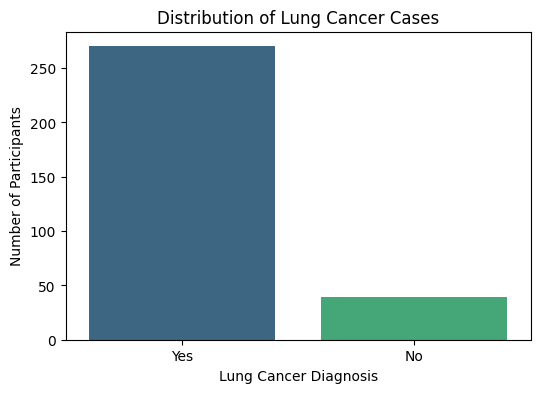

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Distribution of Lung Cancer Cases:")
print(df_processed['LUNG_CANCER'].value_counts())
print("\nPercentage Distribution:")
print(df_processed['LUNG_CANCER'].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
sns.countplot(x='LUNG_CANCER', data=df_processed, palette='viridis')
plt.title('Distribution of Lung Cancer Cases')
plt.xlabel('Lung Cancer Diagnosis')
plt.ylabel('Number of Participants')
plt.show()


Distribution of GENDER:
GENDER
Male      52.427184
Female    47.572816
Name: proportion, dtype: float64


<ipython-input-21-86f3bbb23f2b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='GENDER', data=df_processed, palette='pastel')


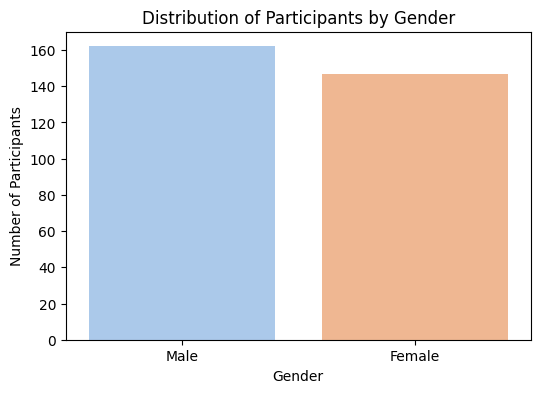


Descriptive Statistics for AGE:
count    309.000000
mean      62.673139
std        8.210301
min       21.000000
25%       57.000000
50%       62.000000
75%       69.000000
max       87.000000
Name: AGE, dtype: float64


<ipython-input-21-86f3bbb23f2b>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(df_processed['AGE'], kde=True, bins=10, palette='coolwarm')


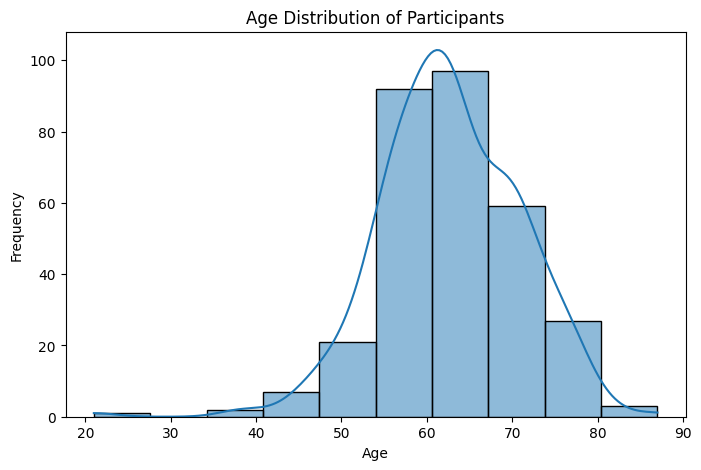

In [21]:
# Gender Distribution
print("\nDistribution of GENDER:")
print(df_processed['GENDER'].value_counts(normalize=True) * 100)
plt.figure(figsize=(6, 4))
sns.countplot(x='GENDER', data=df_processed, palette='pastel')
plt.title('Distribution of Participants by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Participants')
plt.show()

# Age Distribution
print("\nDescriptive Statistics for AGE:")
print(df_processed['AGE'].describe())
plt.figure(figsize=(8, 5))
sns.histplot(df_processed['AGE'], kde=True, bins=10, palette='coolwarm')
plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Lung Cancer Incidence by Gender (Row-wise %):
LUNG_CANCER         No        Yes
GENDER                           
Female       14.965986  85.034014
Male         10.493827  89.506173


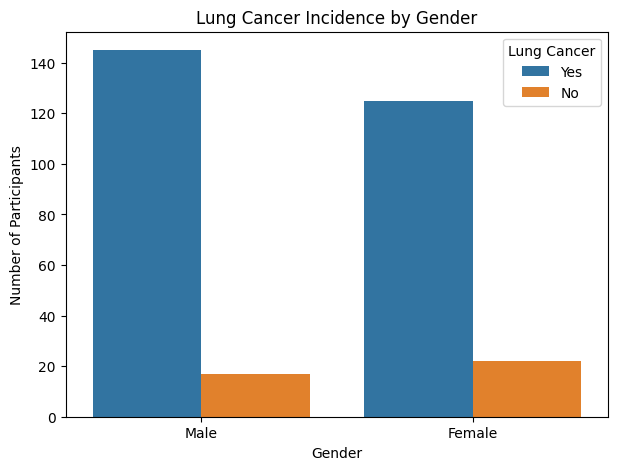

In [22]:
print("\nLung Cancer Incidence by Gender (Row-wise %):")
print(pd.crosstab(df_processed['GENDER'], df_processed['LUNG_CANCER'], normalize='index') * 100)

plt.figure(figsize=(7, 5))
sns.countplot(x='GENDER', hue='LUNG_CANCER', data=df_processed, palette='tab10')
plt.title('Lung Cancer Incidence by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Participants')
plt.legend(title='Lung Cancer')
plt.show()

<ipython-input-23-9b923ef3b6aa>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='LUNG_CANCER', y='AGE', data=df_processed, palette='pastel')


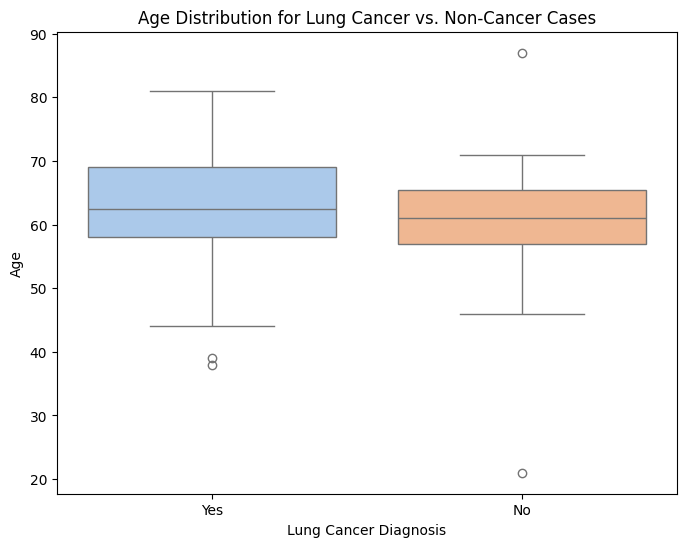

In [23]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='LUNG_CANCER', y='AGE', data=df_processed, palette='pastel')
plt.title('Age Distribution for Lung Cancer vs. Non-Cancer Cases')
plt.xlabel('Lung Cancer Diagnosis')
plt.ylabel('Age')
plt.show()


--- Association of Symptoms/Factors with Lung Cancer ---

Lung Cancer Incidence by Smoking:
LUNG_CANCER         No        Yes
SMOKING                          
No           51.282051  42.592593
Yes          48.717949  57.407407


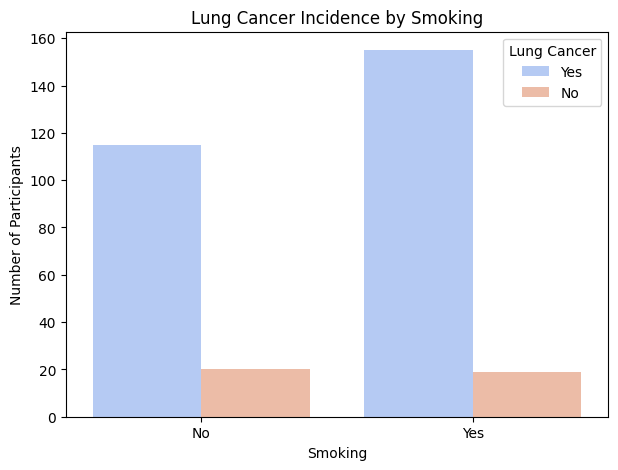


Lung Cancer Incidence by Yellow Fingers:
LUNG_CANCER            No       Yes
YELLOW_FINGERS                     
No              66.666667  39.62963
Yes             33.333333  60.37037


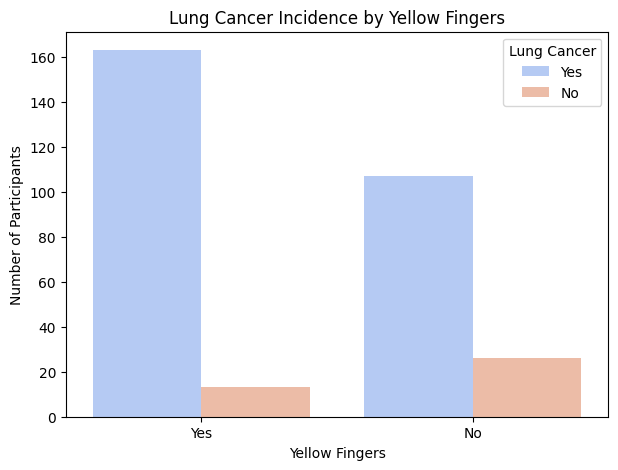


Lung Cancer Incidence by Anxiety:
LUNG_CANCER         No        Yes
ANXIETY                          
No           69.230769  47.407407
Yes          30.769231  52.592593


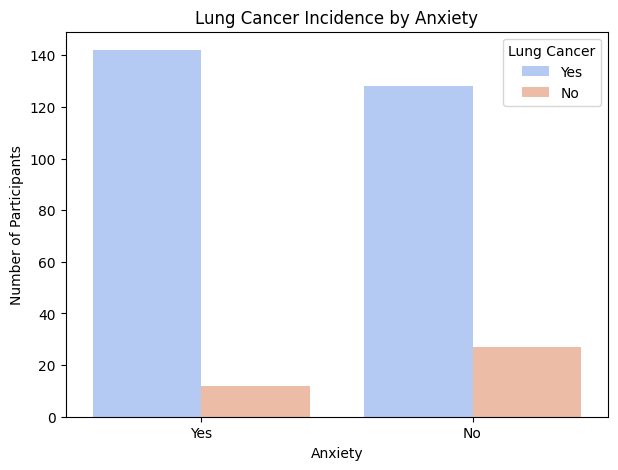


Lung Cancer Incidence by Peer Pressure:
LUNG_CANCER           No        Yes
PEER_PRESSURE                      
No             74.358974  46.296296
Yes            25.641026  53.703704


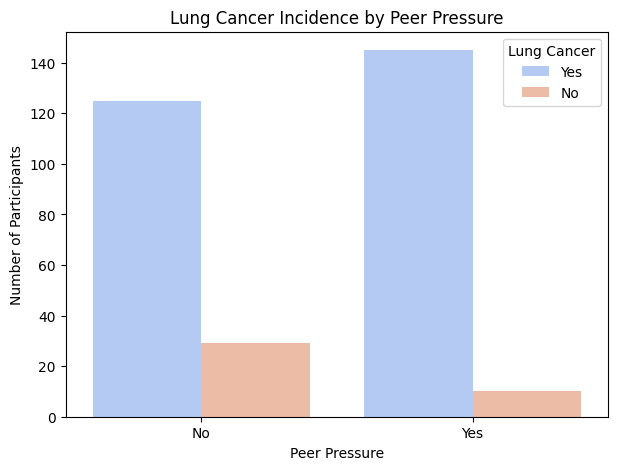


Lung Cancer Incidence by Chronic Disease:
LUNG_CANCER             No        Yes
CHRONIC DISEASE                      
No               64.102564  47.407407
Yes              35.897436  52.592593


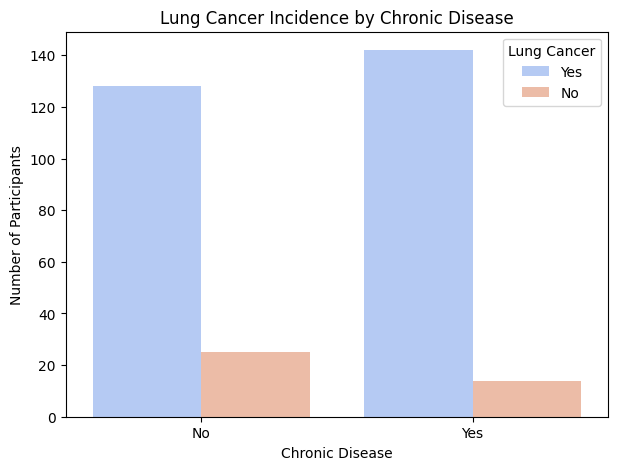


Lung Cancer Incidence by Fatigue:
LUNG_CANCER         No   Yes
FATIGUE                     
No           51.282051  30.0
Yes          48.717949  70.0


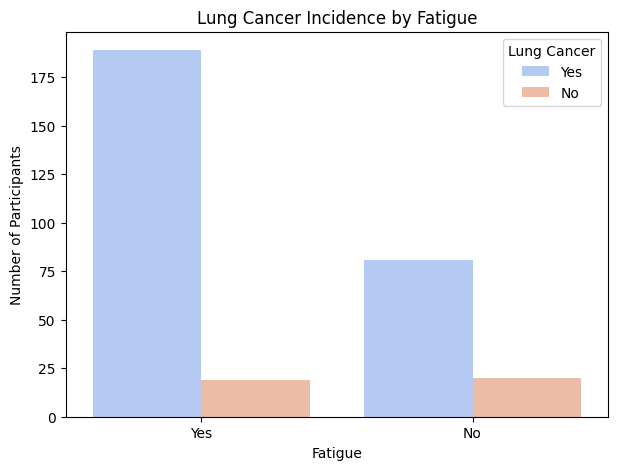


Lung Cancer Incidence by Allergy:
LUNG_CANCER         No        Yes
ALLERGY                          
No           87.179487  38.148148
Yes          12.820513  61.851852


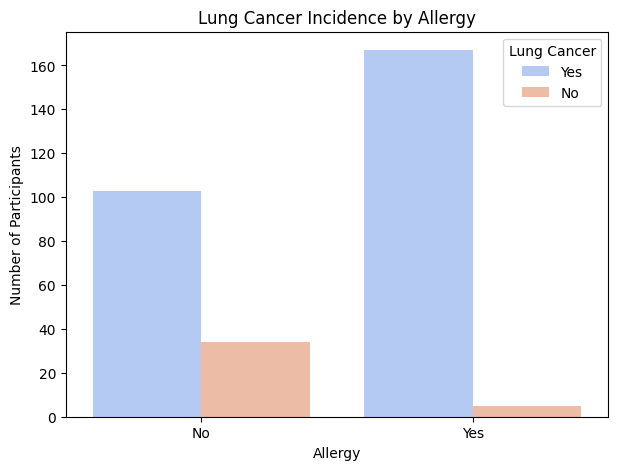


Lung Cancer Incidence by Wheezing:
LUNG_CANCER         No       Yes
WHEEZING                        
No           76.923077  39.62963
Yes          23.076923  60.37037


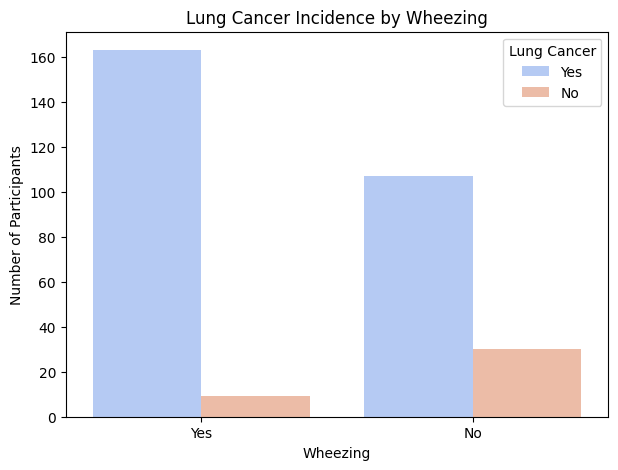


Lung Cancer Incidence by Alcohol Consuming:
LUNG_CANCER               No        Yes
ALCOHOL CONSUMING                      
No                 82.051282  38.888889
Yes                17.948718  61.111111


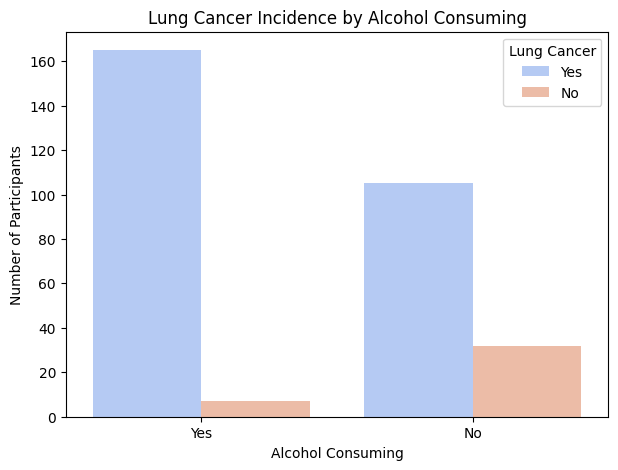


Lung Cancer Incidence by Coughing:
LUNG_CANCER         No        Yes
COUGHING                         
No           74.358974  37.407407
Yes          25.641026  62.592593


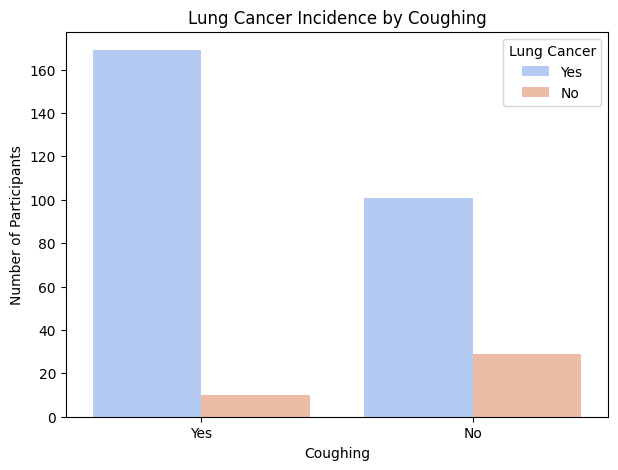


Lung Cancer Incidence by Shortness Of Breath:
LUNG_CANCER                 No        Yes
SHORTNESS OF BREATH                      
No                   43.589744  34.814815
Yes                  56.410256  65.185185


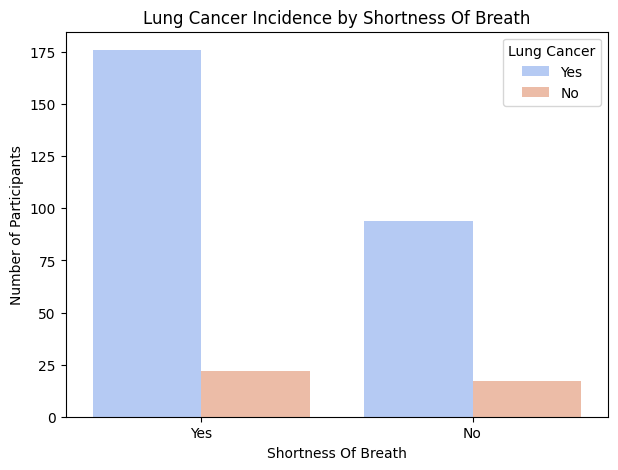


Lung Cancer Incidence by Swallowing Difficulty:
LUNG_CANCER                   No        Yes
SWALLOWING DIFFICULTY                      
No                     87.179487  48.148148
Yes                    12.820513  51.851852


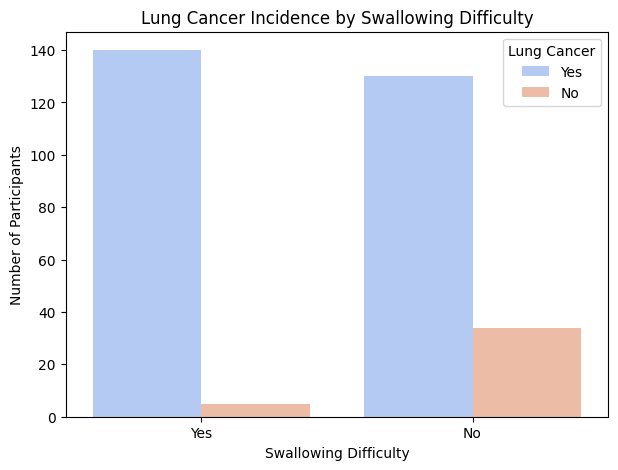


Lung Cancer Incidence by Chest Pain:
LUNG_CANCER         No        Yes
CHEST PAIN                       
No           69.230769  40.740741
Yes          30.769231  59.259259


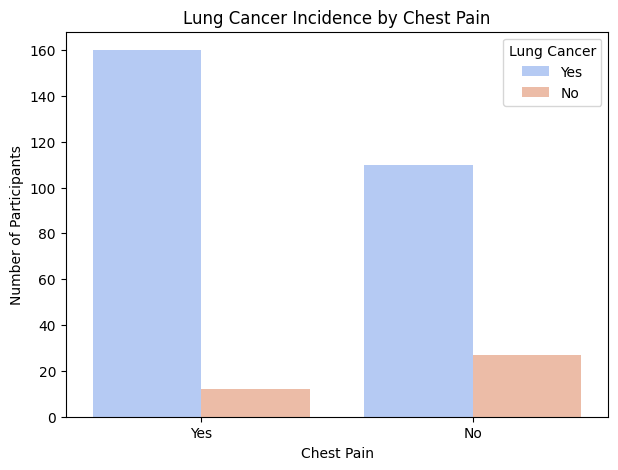

In [24]:
binary_features_clean = [
    'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
    'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
    'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
    'SWALLOWING DIFFICULTY', 'CHEST PAIN'
]

print("\n--- Association of Symptoms/Factors with Lung Cancer ---")
for feature in binary_features_clean:
    print(f"\nLung Cancer Incidence by {feature.replace('_', ' ').title()}:")
    # Using normalize='columns' shows the proportion of 'Yes'/'No' within the Lung Cancer groups
    print(pd.crosstab(df_processed[feature], df_processed['LUNG_CANCER'], normalize='columns') * 100)

    plt.figure(figsize=(7, 5))
    sns.countplot(x=feature, hue='LUNG_CANCER', data=df_processed, palette='coolwarm')
    plt.title(f'Lung Cancer Incidence by {feature.replace("_", " ").title()}')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel('Number of Participants')
    plt.legend(title='Lung Cancer')
    plt.show()

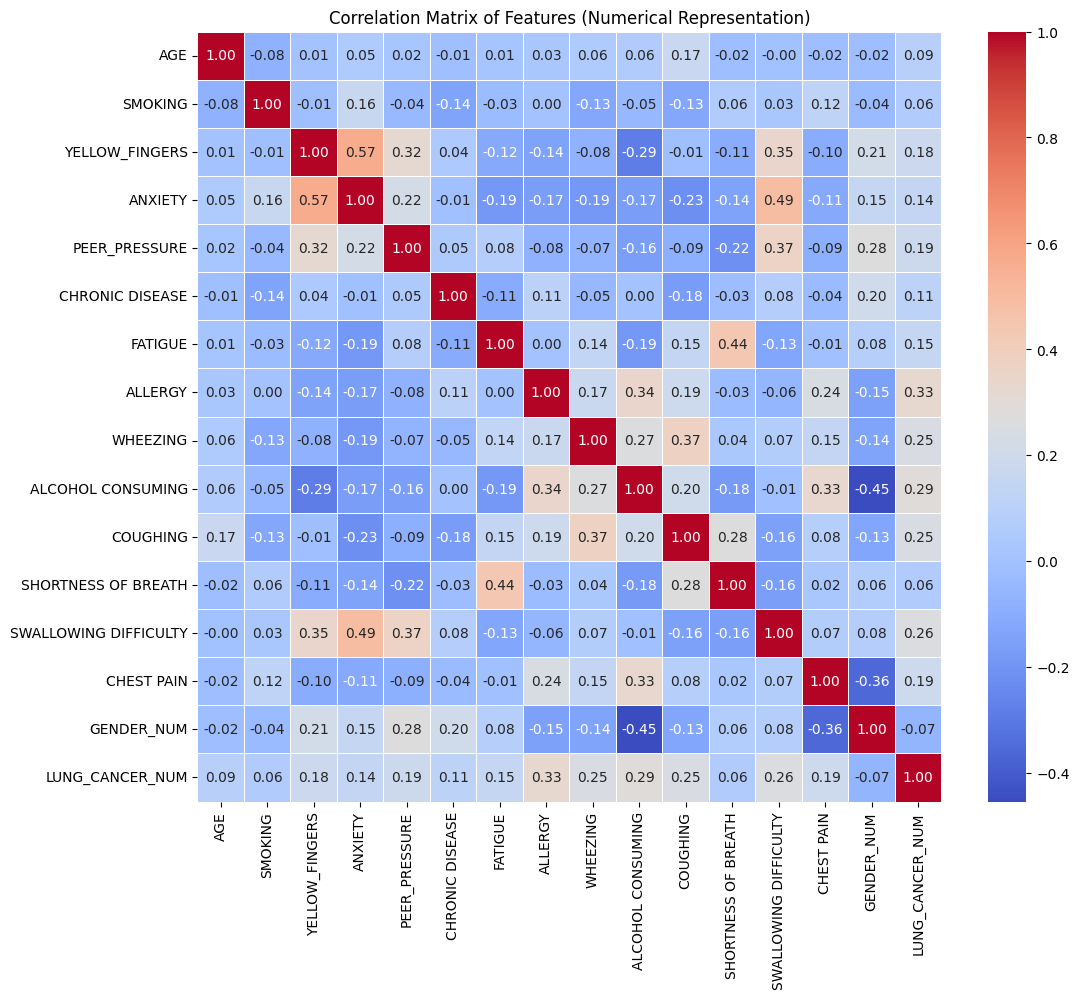


Correlation with Lung Cancer (Target Variable):
LUNG_CANCER_NUM          1.000000
ALLERGY                  0.327766
ALCOHOL CONSUMING        0.288533
SWALLOWING DIFFICULTY    0.259730
WHEEZING                 0.249300
COUGHING                 0.248570
CHEST PAIN               0.190451
PEER_PRESSURE            0.186388
YELLOW_FINGERS           0.181339
FATIGUE                  0.150673
ANXIETY                  0.144947
CHRONIC DISEASE          0.110891
AGE                      0.089465
SHORTNESS OF BREATH      0.060738
SMOKING                  0.058179
GENDER_NUM              -0.067254
Name: LUNG_CANCER_NUM, dtype: float64


In [27]:
# Create numerical representations for categorical columns for correlation
df_corr = df_processed.copy()
df_corr['GENDER_NUM'] = df_corr['GENDER'].map({'Male': 0, 'Female': 1})
df_corr['LUNG_CANCER_NUM'] = df_corr['LUNG_CANCER'].map({'No': 0, 'Yes': 1})

# Map binary features back to 0/1 for correlation calculation
for col in binary_features_clean:
    df_corr[col] = df_corr[col].map({'No': 0, 'Yes': 1})

# Select only numerical columns for correlation matrix
numeric_df = df_corr.select_dtypes(include=['int64', 'float64']) # 'Age' and the mapped 0/1 columns
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features (Numerical Representation)')
plt.show()

# Focus on correlation with LUNG_CANCER_NUM
print("\nCorrelation with Lung Cancer (Target Variable):")
print(correlation_matrix['LUNG_CANCER_NUM'].sort_values(ascending=False))

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
file_path = '/content/survey_lung_cancer[1].csv'
df = pd.read_csv(file_path)

# Clean column names by stripping leading/trailing whitespace
df.columns = df.columns.str.strip()

# Create a copy for processing
df_processed = df.copy()

# Define the list of binary columns for mapping (ensure names match your actual df.columns after strip)
binary_features_clean = [
    'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
    'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
    'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
    'SWALLOWING DIFFICULTY', 'CHEST PAIN'
]

In [30]:
# Map binary features (assuming 1=No, 2=Yes)
for col in binary_features_clean:
    if col in df_processed.columns: # Check if column exists before mapping
        df_processed[col] = df_processed[col].map({1: 'No', 2: 'Yes'})
    else:
        print(f"Warning: Column '{col}' not found for mapping.")

# Map Gender and Lung Cancer for consistency and later numerical encoding for modeling
if 'GENDER' in df_processed.columns:
    df_processed['GENDER'] = df_processed['GENDER'].map({'M': 'Male', 'F': 'Female'})
else:
    print("Warning: Column 'GENDER' not found.")

if 'LUNG_CANCER' in df_processed.columns:
    df_processed['LUNG_CANCER'] = df_processed['LUNG_CANCER'].map({'NO': 'No', 'YES': 'Yes'})
else:
    print("Warning: Column 'LUNG_CANCER' not found.")

In [31]:
df_model = df_processed.copy()

# Map binary features from 'No'/'Yes' to 0/1
for col in binary_features_clean:
    if col in df_model.columns:
        df_model[col] = df_model[col].map({'No': 0, 'Yes': 1})

# Map GENDER to 0/1
if 'GENDER' in df_model.columns:
    df_model['GENDER'] = df_model['GENDER'].map({'Male': 0, 'Female': 1})
else:
    print("Error: GENDER column missing for model preparation.")
    # Exit or handle gracefully if GENDER is crucial and missing

# Map LUNG_CANCER (target variable) to 0/1
if 'LUNG_CANCER' in df_model.columns:
    df_model['LUNG_CANCER_NUM'] = df_model['LUNG_CANCER'].map({'No': 0, 'Yes': 1})
else:
    print("Error: LUNG_CANCER column missing for model preparation.")
    # Exit or handle gracefully if LUNG_CANCER is crucial and missing


# Define features (X) and target (y)
# Drop the original LUNG_CANCER string column as we have LUNG_CANCER_NUM
X = df_model.drop(['LUNG_CANCER', 'LUNG_CANCER_NUM'], axis=1) # Features
y = df_model['LUNG_CANCER_NUM'] # Target

print("\nFeatures (X) for modeling:")
print(X.head())
print("\nTarget (y) for modeling:")
print(y.head())



Features (X) for modeling:
   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       0   69        0               1        1              0   
1       0   74        1               0        0              0   
2       1   59        0               0        0              1   
3       0   63        1               1        1              0   
4       1   63        0               1        0              0   

   CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                0        1        0         1                  1         1   
1                1        1        1         0                  0         0   
2                0        1        0         1                  0         1   
3                0        0        0         0                  1         0   
4                0        0        0         1                  0         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
0                    1            

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")



Training set size: 247 samples
Test set size: 62 samples


In [36]:
model = LogisticRegression(random_state=42, solver='liblinear') # liblinear is good for small datasets

In [37]:
print("\nTraining the Logistic Regression model...")
model.fit(X_train, y_train)
print("Model training complete.")


Training the Logistic Regression model...
Model training complete.


In [38]:
# 5. Make Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1] # Probabilities for the 'Yes' class


In [39]:
print("\n--- Model Evaluation ---")


--- Model Evaluation ---


In [40]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8871


In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[ 3  5]
 [ 2 52]]


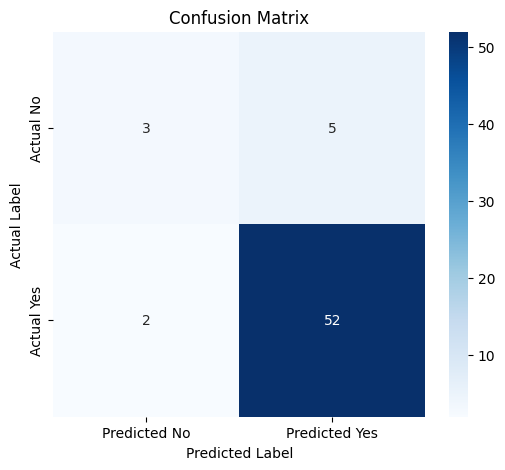

In [42]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [43]:
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.38      0.46         8
           1       0.91      0.96      0.94        54

    accuracy                           0.89        62
   macro avg       0.76      0.67      0.70        62
weighted avg       0.87      0.89      0.88        62



In [44]:
# --- Further Interpretations ---
print("\n--- Model Coefficients (Feature Importance for Logistic Regression) ---")
# Get feature names and their corresponding coefficients
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
# Sort by absolute coefficient value to see most influential features
feature_importance['Abs_Coefficient'] = abs(feature_importance['Coefficient'])
print(feature_importance.sort_values(by='Abs_Coefficient', ascending=False))


--- Model Coefficients (Feature Importance for Logistic Regression) ---
                  Feature  Coefficient  Abs_Coefficient
6         CHRONIC DISEASE     1.464555         1.464555
7                 FATIGUE     1.437628         1.437628
8                 ALLERGY     1.425101         1.425101
10      ALCOHOL CONSUMING     1.403825         1.403825
5           PEER_PRESSURE     1.311088         1.311088
13  SWALLOWING DIFFICULTY     0.986054         0.986054
11               COUGHING     0.976742         0.976742
3          YELLOW_FINGERS     0.779018         0.779018
9                WHEEZING     0.736592         0.736592
4                 ANXIETY     0.557717         0.557717
2                 SMOKING     0.506999         0.506999
14             CHEST PAIN     0.389417         0.389417
0                  GENDER    -0.071293         0.071293
1                     AGE    -0.044699         0.044699
12    SHORTNESS OF BREATH    -0.003318         0.003318


In [45]:
new_patient_data = {
    'GENDER': ['Female'],
    'AGE': [68],
    'SMOKING': ['Yes'],
    'YELLOW_FINGERS': ['No'],
    'ANXIETY': ['Yes'],
    'PEER_PRESSURE': ['No'],
    'CHRONIC DISEASE': ['Yes'],
    'FATIGUE': ['No'],
    'ALLERGY': ['No'],
    'WHEEZING': ['Yes'],
    'ALCOHOL CONSUMING': ['Yes'],
    'COUGHING': ['Yes'],
    'SHORTNESS OF BREATH': ['Yes'],
    'SWALLOWING DIFFICULTY': ['No'],
    'CHEST PAIN': ['Yes']
}

In [46]:
new_patient_df = pd.DataFrame(new_patient_data)

print("Original New Patient Data:")
print(new_patient_df)

Original New Patient Data:
   GENDER  AGE SMOKING YELLOW_FINGERS ANXIETY PEER_PRESSURE CHRONIC DISEASE  \
0  Female   68     Yes             No     Yes            No             Yes   

  FATIGUE ALLERGY WHEEZING ALCOHOL CONSUMING COUGHING SHORTNESS OF BREATH  \
0      No      No      Yes               Yes      Yes                 Yes   

  SWALLOWING DIFFICULTY CHEST PAIN  
0                    No        Yes  


In [49]:
binary_features_str = [
    'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
    'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
    'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
    'SWALLOWING DIFFICULTY', 'CHEST PAIN'
]

# Map binary features from 'No'/'Yes' to 0/1
for col in binary_features_str:
    if col in new_patient_df.columns:
        new_patient_df[col] = new_patient_df[col].map({'No': 0, 'Yes': 1})
    else:
        print(f"Warning: Column '{col}' not found in new_patient_df for mapping.")

# Map GENDER to 0/1
if 'GENDER' in new_patient_df.columns:
    new_patient_df['GENDER'] = new_patient_df['GENDER'].map({'Male': 0, 'Female': 1})
else:
    print("Error: GENDER column missing in new_patient_df.")

In [50]:
# Make sure X is defined from the previous code block as well
expected_column_order = ['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
                         'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
                         'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
                         'SWALLOWING DIFFICULTY', 'CHEST PAIN']

# Reindex the new_patient_df to match the order of X_train
new_patient_df_processed = new_patient_df[expected_column_order]

print("\nProcessed New Patient Data (ready for prediction):")
print(new_patient_df_processed)


Processed New Patient Data (ready for prediction):
   GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0       1   68        1               0        1              0   

   CHRONIC DISEASE  FATIGUE  ALLERGY  WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1        0        0         1                  1         1   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
0                    1                      0           1  


In [51]:
prediction = model.predict(new_patient_df_processed)
prediction_proba = model.predict_proba(new_patient_df_processed)

print("\n--- Model Prediction ---")

# Interpret the prediction
if prediction[0] == 1:
    print("The model predicts: This individual is likely to have Lung Cancer.")
else:
    print("The model predicts: This individual is likely NOT to have Lung Cancer.")

# Print probabilities
# prediction_proba will be an array like [[prob_class_0, prob_class_1]]
print(f"Probability of NOT having Lung Cancer (Class 0): {prediction_proba[0][0]:.4f}")
print(f"Probability of having Lung Cancer (Class 1): {prediction_proba[0][1]:.4f}")


--- Model Prediction ---
The model predicts: This individual is likely to have Lung Cancer.
Probability of NOT having Lung Cancer (Class 0): 0.0887
Probability of having Lung Cancer (Class 1): 0.9113
